# IMPORTING DEPENDENCIES

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# READING THE DATASET

In [3]:
df=pd.read_csv('Iris.csv')

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# CHECKING INFO,DESCRIPTION AND COLUMNS IN DATASET

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# COUNT OF PARTICULAR SPECIES

In [8]:
df['Species'].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

# CHECKING NULL VALUES IN DATASET

In [9]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# PLOTTING HISTOGRAM OF SEPAL AND PETAL LENGTH

[]

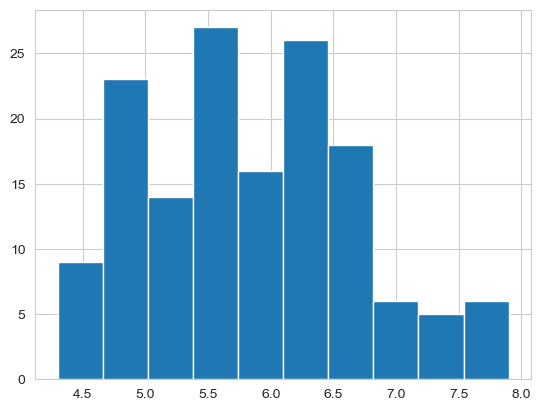

In [33]:
sns.set_style('whitegrid')
df['SepalLengthCm'].hist().plot()

[]

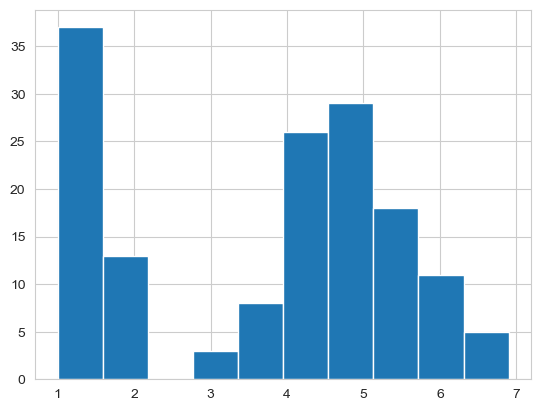

In [34]:
df['PetalLengthCm'].hist().plot()

# PLOTTING PAIRPLOT TO SEE RELATION BETWEEN FEATURES

C:\Users\91985\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


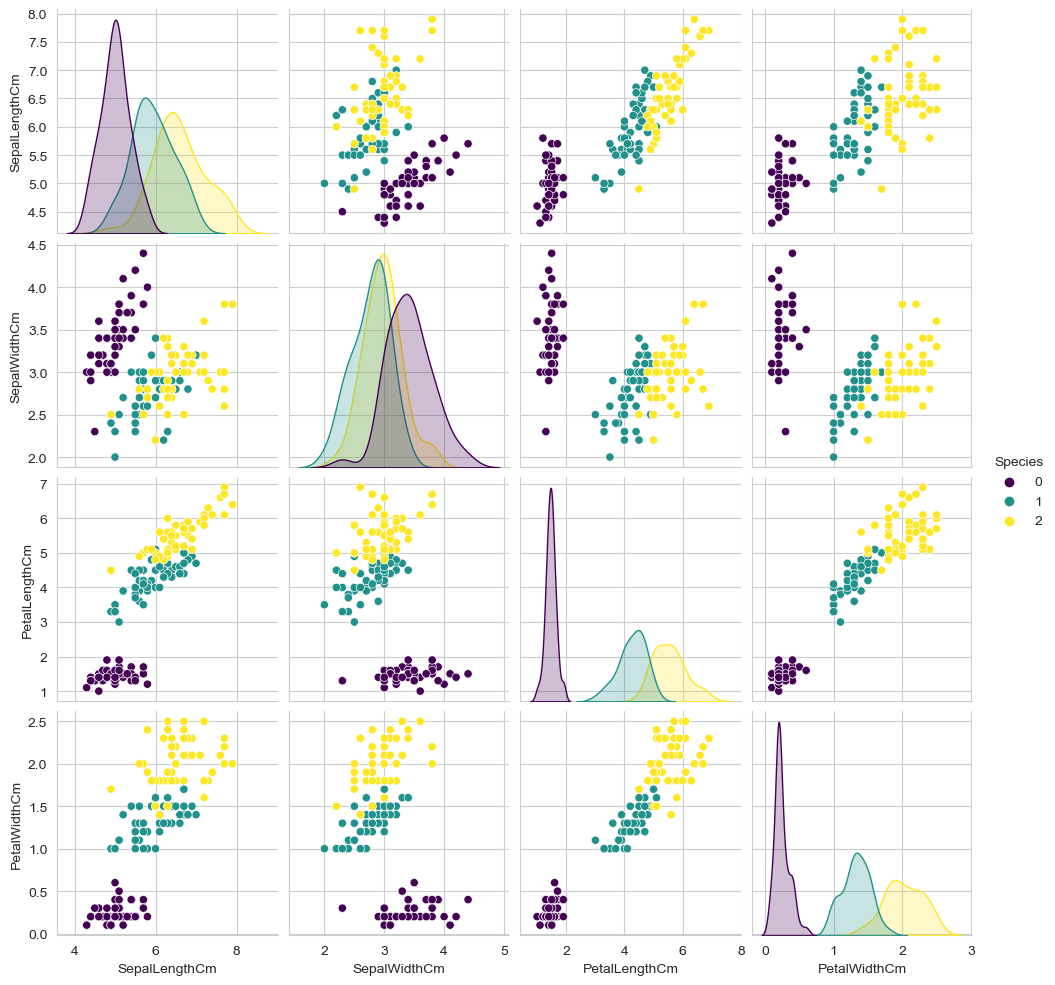

In [45]:
sns.pairplot(df.drop('Id',axis=1),hue='Species',palette='viridis')

# MAPPING OF SPECIES TO A PARTICULAR LABELS

In [11]:
species_mapping = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
df['Species'] = df['Species'].map(species_mapping)

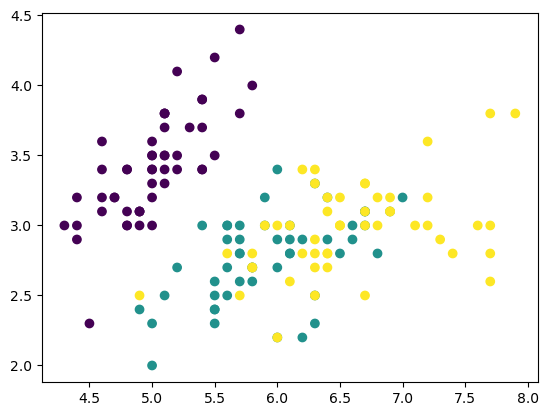

In [12]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'],c=df['Species'],cmap='viridis')

# SCATTER PLOT BETWEEN PETAL LENGTH AND WIDTH

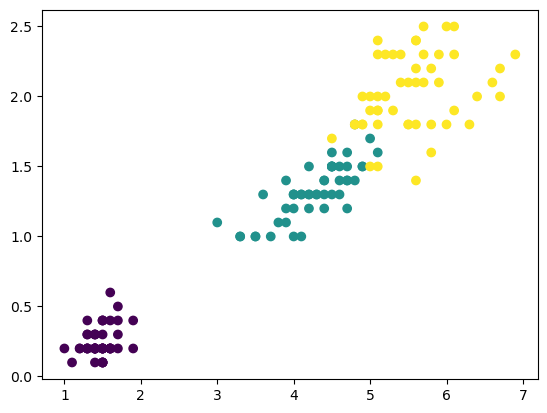

In [13]:
plt.scatter(df['PetalLengthCm'],df['PetalWidthCm'],c=df['Species'],cmap='viridis')

# CORRELATION BETWEEN FEATURES

In [14]:
df.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,1.000000,0.716676,-0.397729,0.882747,0.899759,0.942830
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954,0.782561
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544,-0.419446
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757,0.949043
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000,0.956464
Species,0.942830,0.782561,-0.419446,0.949043,0.956464,1.000000


<Axes: >

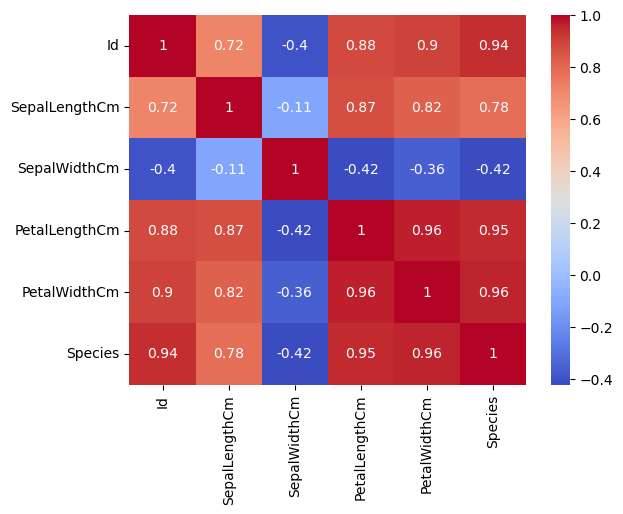

In [15]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

# IMPORTING TRAIN TEST SPLIT

In [16]:
from sklearn.model_selection import train_test_split

# DIVIDING THE DATA INTO TRAINING AND TESTING DATA

In [17]:
X=df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
y=df['Species']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=101)

In [19]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
13,4.3,3.0,1.1,0.1
102,7.1,3.0,5.9,2.1
67,5.8,2.7,4.1,1.0
34,4.9,3.1,1.5,0.1
98,5.1,2.5,3.0,1.1
...,...,...,...,...
63,6.1,2.9,4.7,1.4
70,5.9,3.2,4.8,1.8
81,5.5,2.4,3.7,1.0
11,4.8,3.4,1.6,0.2


# IMPORTING MACHINE LEARNING MODEL

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr=LogisticRegression()

# training the model

In [22]:
lr.fit(X_train,y_train)

LogisticRegression()

# make predictions 

In [23]:
prediction=lr.predict(X_test)

# Results evaluation

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.95      0.97        20
           2       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



In [26]:
print('Accuracy:',lr.score(X_test,y_test)*100)

Accuracy: 97.77777777777777


# importing knn model 

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [40]:
knn=KNeighborsClassifier(n_neighbors=5)

In [41]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [42]:
predict=knn.predict(X_test)

In [43]:
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        20
           2       1.00      1.00      1.00        12

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [44]:
print('Accuracy:',knn.score(X_test,y_test)*100)

Accuracy: 100.0
